# Customer Segmentation Using K-Means Clustering
## Project Overview

In this project, I performed customer segmentation using behavioral and financial features to identify distinct customer groups. The goal was to understand purchasing behavior, engagement patterns, and discount dependency to support targeted marketing and business strategy.

### Power BI Dashboard – Customer Segmentation Using K-Means Clustering

![Power BI Clustering Dashboard](images/Clustering.png)

### View interactive Dashboard🔗 [Click here](https://app.powerbi.com/groups/me/reports/cd878648-5cca-46b5-aac6-cf2fc783bb94/04172bfa54064bbd163f?experience=power-bi)
-----------------------

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

## Data Cleaning

Basic cleaning was performed to remove unrealistic negative values in key behavioral variables.

In [5]:

df = pd.read_csv(r"D:\Projects\Clustering segmentation Project\Datasets\customer_data.csv")


df = df[
    (df['NumberOfPurchases'] >= 0) &
    (df['TimeSpentOnWebsite'] >= 0) &
    (df['CustomerTenureYears'] >= 0) &
    (df['LastPurchaseDaysAgo'] >= 0)
]



## Feature Engineering (Behavioral Metrics)

Instead of using raw columns directly, new behavioral indicators were created.

In [6]:

df['MonetaryScore'] = df['AnnualIncome'] * df['NumberOfPurchases']
df['EngagementRate'] = df['SessionCount'] / (df['CustomerTenureYears'] + 1)
df['DiscountDependency'] = df['DiscountsAvailed'] / (df['NumberOfPurchases'] + 1)
df['PurchaseEfficiency'] = df['NumberOfPurchases'] / (df['TimeSpentOnWebsite'] + 1)
df['RecencyNormalized'] = df['LastPurchaseDaysAgo'] / (df['CustomerTenureYears'] + 1)



## Feature Scaling

Since clustering is distance-based, features were standardized using:
StandardScaler(), This would ensures all variables contribute equally to cluster formation.

In [7]:
features = [
    'MonetaryScore',
    'EngagementRate',
    'PurchaseEfficiency',
    'DiscountDependency',
    'RecencyNormalized'
]


scaler = StandardScaler()
X = scaler.fit_transform(df[features])


## K-Means Clustering

K-Means was applied with 4 clusters to group customers based on similar behaviours 
for evaluating  clustering quality, the Silhouette Score was calculated. Higher silhouette score indicated well-separated clusters, ans then average values of key features we selected earlier were computed for each cluster.

In [8]:

kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

print(
    "Silhouette Score:",
    silhouette_score(X, df['Cluster'], sample_size=10000, random_state=42)
)


cluster_profile = df.groupby('Cluster')[features].mean().round(2)
print(cluster_profile)

Silhouette Score: 0.26893421224947406
         MonetaryScore  EngagementRate  PurchaseEfficiency  \
Cluster                                                      
0            889697.97            2.95                0.60   
1           1782126.75            0.74                1.39   
2            520107.70            0.69                0.38   
3            903549.41            1.40                0.61   

         DiscountDependency  RecencyNormalized  
Cluster                                         
0                      0.36              25.71  
1                      0.18              17.23  
2                      0.56              15.38  
3                      0.37              88.62  


## PCA Visualization

To visualize clusters in 2D space, Principal Component Analysis was used. This helped to visually confirm separation between segments.

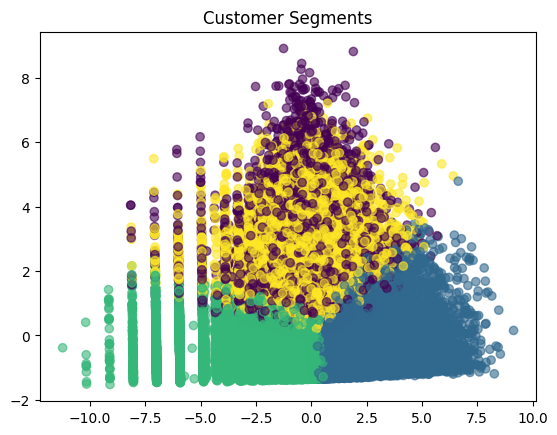

In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.title("Customer Segments")
plt.show()

## Business Segment Labels
Clusters were translated into categories which could be referenced across business.

In [11]:
labels = {
    0: "Budget Frequent Buyers",
    1: "Premium Active Buyers",
    2: "Discount Hunters",
    3: "Engaged Explorers"
}

df['Segment'] = df['Cluster'].map(labels)